Output variable -> 
y
y -> 
Whether the client has subscribed a term deposit or not 
Binomial 
("yes" or "no")


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("F:\\Excelr\\Assignment\\Using R\\LogisticRegression\\bank-full.csv")

In [3]:
data.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [8]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [9]:
countNo = len(data[data.y=="no"])
countYes = len(data[data.y=="yes"])

print("percentage of no {:.3f}%".format((countNo/(len(data.y))*100)))
print("percentage of YEs {:.3f}%".format((countYes/(len(data.y))*100)))


percentage of no 88.302%
percentage of YEs 11.698%


In [10]:
data.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


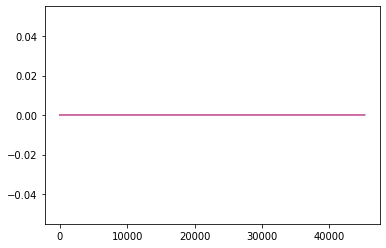

In [11]:
plt.plot(data.isnull())
plt.show()

In [12]:
data.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [13]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
x = data.drop(['y','job','marital','education','contact',
              'housing','loan','day','month','poutcome'],axis=1)
y = data['y']

In [15]:
x.shape

(45211, 7)

In [16]:
y.shape

(45211,)

In [17]:
x = pd.get_dummies(x)
y = pd.get_dummies(y)
x.head(2)


,age,balance,duration,campaign,pdays,previous,default_no,default_yes
0,58,2143,261,1,-1,0,1,0
1,44,29,151,1,-1,0,1,0


In [18]:
for col in x.columns:
    print(col)

age
balance
duration
campaign
pdays
previous
default_no
default_yes


In [21]:
for col in y.columns:
    print(col)

no
yes


In [19]:
x.columns
x = x.drop(['default_no'],axis=1)


In [20]:
x = x.rename(columns ={'default_yes':'default'})

In [22]:
y.columns
y = y.drop(['yes'], axis=1)
y = y.rename(columns ={'no':'y'})

In [23]:
model = lr(solver ="liblinear", random_state=0)

In [24]:
model.fit(x,y)

C:\Users\This\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [28]:
model.classes_

array([0, 1], dtype=uint8)

In [29]:
model.intercept_

array([3.42201808])

In [30]:
model.coef_

array([[-6.68584375e-03, -3.66369846e-05, -3.61769724e-03,
         1.29481080e-01, -2.09672873e-03, -8.53508104e-02,
         2.42605752e-01]])

In [31]:
model.predict_proba(x)

array([[0.10497918, 0.89502082],
       [0.06226406, 0.93773594],
       [0.04487571, 0.95512429],
       ...,
       [0.79254469, 0.20745531],
       [0.15463744, 0.84536256],
       [0.3349852 , 0.6650148 ]])

In [32]:
model.predict(x)

array([1, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [33]:
model.score(x,y)

0.888788126783305

In [34]:
confusion_matrix(y,model.predict(x))

array([[  895,  4394],
       [  634, 39288]], dtype=int64)

In [35]:
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       0.59      0.17      0.26      5289
           1       0.90      0.98      0.94     39922

    accuracy                           0.89     45211
   macro avg       0.74      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [37]:
import statsmodels.api as sm

In [42]:
model1 = sm.Logit(y,x)
result = model1.fit(method='newton')

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


In [44]:
result.params

age         0.060811
balance    -0.000035
duration   -0.003019
campaign    0.282589
pdays      -0.001006
previous   -0.085938
default     0.778173
dtype: float64

In [45]:
result.predict(x)

0        0.950185
1        0.924308
2        0.887037
3        0.943307
4        0.844555
           ...   
45206    0.725473
45207    0.969144
45208    0.851664
45209    0.954378
45210    0.619600
Length: 45211, dtype: float64

In [46]:
result.summary()

C:\Users\This\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\This\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45204
Method:                           MLE   Df Model:                            6
Date:                Mon, 02 Nov 2020   Pseudo R-squ.:                     inf
Time:                        13:46:40   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0608      0.001     73.267      0.000       0.059       0.062
balance    -3.466e-05   4.33e-06     -8.008      0.000   -4.31e-05   -2.62e-05
duration      -0.0030   5.32e-05    -56.789      0.000      -0.003      -0.003
campaign       0.2826      0.011     25.487      0.000       0.261       0.304
pdays         -0.0010      0.000     -6.586      0.000      -0.001      -0.001
previous      -0.0859      0.008    -11.145      0.000      -0.101      -0.071
default        0.7782      0.152      5.112      0.000       0.480       1.077
==============================================================================
"""